In [1]:
%matplotlib inline

from __future__ import print_function, division
import utils; reload(utils)
from utils import *
from IPython.display import FileLink


Using TensorFlow backend.


In [2]:
path = "data/state/sample/"
batch_size = 64

# Create Sample

In [3]:
%cd data/state/

/home/wayne/docker_file/keras_notebook/fastai_course/practice_code/data/state


In [4]:
%cd train/

/home/wayne/docker_file/keras_notebook/fastai_course/practice_code/data/state/train


In [5]:
%mkdir ../valid

%mkdir ../sample
%mkdir ../sample/train
%mkdir ../sample/valid

In [6]:
for d in glob('c?'):
    os.mkdir('../valid/'+d)
#     print(d)
    os.mkdir('../sample/train/'+d)
    os.mkdir('../sample/valid/'+d)

In [8]:
from shutil import copyfile, move

In [10]:
%pwd

u'/home/wayne/docker_file/keras_notebook/fastai_course/practice_code/data/state/train'

In [14]:
g = glob('c?/*.jpg')
shuf = np.random.permutation(g)
for i in range(4500): move(shuf[i],'../valid/' + shuf[i])

In [16]:
# print(shuf.shape)
# %for((i=0;i<10;i++)); do ls valid/c$i/ | wc -l; done

ERROR:root:Line magic function `%for` not found.


In [17]:
g = glob('c?/*.jpg')
shuf = np.random.permutation(g)
for i in range(1500): copyfile(shuf[i], '../sample/train/'+shuf[i])

In [18]:
%cd ../valid

/home/wayne/docker_file/keras_notebook/fastai_course/practice_code/data/state/valid


In [19]:
# g = glob('c?/*.jpg')
# for i in g: copyfile(i, '../sample/valid/'+i)
g = glob('c?/*.jpg')
shuf = np.random.permutation(g)
for i in range(2000): copyfile(shuf[i], '../sample/valid/' + shuf[i])

In [20]:
%cd ../../..

/home/wayne/docker_file/keras_notebook/fastai_course/practice_code


In [21]:
%mkdir data/state/results

In [22]:
%mkdir data/state/sample/test

# Start from here
## Create batches

In [79]:
batches = get_batches(path+'train', batch_size=batch_size)
val_batches = get_batches(path+'valid', batch_size=batch_size,shuffle=False)

Found 1500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [25]:
(val_classes, trn_classes, val_labels, trn_labels, val_filenames, filenames,
    test_filename) = get_classes(path)

Found 1500 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.
Found 0 images belonging to 0 classes.


<type 'tuple'> 
 2 (64, 224, 224, 3) (64, 10)
[[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]


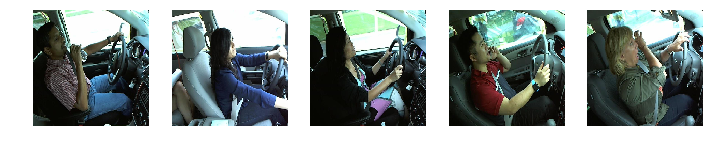

In [49]:
#plot a example image here
img4show = batches.next()
print(type(img4show),'\n', len(img4show), img4show[0].shape,img4show[1].shape)
print(img4show[1][:5])
plots(img4show[0][:5])

## Build a model
### Start with two conv layers

In [37]:
model = Sequential()
#conv1
model.add(Conv2D(
    filters=32,
    kernel_size=3,
    padding='same',
    input_shape=(224,224,3),
    activation='relu'
))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D((3,3)))
#conv2
model.add(Conv2D(
    filters=64,
    kernel_size=3,
    padding='same',
    activation='relu'
))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D((3,3)))
#FC layer
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))

In [38]:
model.compile(Adam(lr=1e-4), loss='categorical_crossentropy',metrics=['accuracy'])

In [40]:
model.fit_generator(batches, batches.samples, epochs=2, validation_data=val_batches,
                    validation_steps=val_batches.samples)

Epoch 1/2
1500/1500 [==============================] - 5410s - loss: 0.0445 - acc: 0.9888 - val_loss: 0.1328 - val_acc: 0.9648

### Finetune from VGG

In [50]:
from vgg16_tf import Vgg16

In [51]:
vgg = Vgg16()
vgg_model = vgg.model

vgg16_tf.py:55: UserWarning: Update your `ZeroPadding2D` call to the Keras 2 API: `ZeroPadding2D((1, 1), data_format="channels_last")`
  model.add(ZeroPadding2D((1, 1),dim_ordering='tf'))
vgg16_tf.py:56: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", data_format="channels_last")`
  model.add(Convolution2D(filters, 3, 3, activation='relu',dim_ordering='tf'))
vgg16_tf.py:57: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), strides=(2, 2), data_format="channels_last")`
  model.add(MaxPooling2D((2, 2), strides=(2, 2),dim_ordering='tf'))
vgg16_tf.py:56: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", data_format="channels_last")`
  model.add(Convolution2D(filters, 3, 3, activation='relu',dim_ordering='tf'))
vgg16_tf.py:56: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu", data_format="channels_last")`
  m

In [52]:
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 224, 224, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 114, 114, 64)      0         
__________

In [53]:
#remove the final layer
vgg_model.pop()
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 224, 224, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 114, 114, 64)      0         
__________

In [54]:
for layer in vgg_model.layers: layer.trainable=False

In [55]:
vgg_model.add(Dense(10, activation='softmax'))

In [57]:
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 224, 224, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 114, 114, 64)      0         
__________

In [56]:
vgg_model.compile(Adam(lr=1e-4), loss='categorical_crossentropy',metrics=['accuracy'])

In [80]:
vgg_model.fit_generator(batches, batches.samples, epochs=2, validation_data=val_batches,
                    validation_steps=val_batches.samples)

Epoch 1/2
1500/1500 [==============================] - 1399s - loss: 0.9141 - acc: 0.6885 - val_loss: 0.5383 - val_acc: 0.8536

In [83]:
os.mkdir(path+'models')
vgg_model.save_weights(path+'models/vgg_model.h5')